In [49]:
# Goal: Quick and rough estimate of the [OIII fluxes]
import sys, os
import warnings
warnings.filterwarnings("ignore", module="dynesty.sampling")
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as aconst
import astropy.units as u
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc
import astropy.table as table
from astropy.cosmology import Planck15 as cosmology
import pyneb as pn

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataloader as dataloader
import snelib19odp.const as const
import snelib19odp.analysis.oxygen as oxygen
import snelib19odp.blackbody as blackbody
import snelib19odp.specds as specds

In [2]:
def flux2luminosity(flux, distance):
    # all in cgs units
    return flux * 4 * np.pi * distance**2
dist_mpc = 64
dist_cm = dist_mpc * 1e6 * u.pc.to(u.cm)

In [3]:
sds = specds.load_dataset('SN2019odp')

In [32]:
spec = sds['ZTF19abqwtfu_20200124_Keck1_v1']

idx = ~np.isnan(spec['flux'])

# clip narrow lines
idx = np.logical_and(idx, np.abs(spec['restwave']-5007) > 6)
idx = np.logical_and(idx, np.abs(spec['restwave']-4959) > 6)

spec = spec[idx]
spec

<Table length=5096>
   col1       col2         col3    ... fluxerr mask      restwave     
 float64    float64      float64   ... float64 bool      float64      
--------- ------------ ----------- ... ------- ---- ------------------
3077.8789  5.06267e-17 1.75022e-16 ...     nan True 3034.3272016743676
3079.8264 -7.97656e-17 1.31711e-16 ...     nan True  3036.247144731666
3081.7744  5.95832e-17 2.12345e-16 ...     nan True 3038.1675807140114
3083.7229  7.42197e-17 1.93656e-16 ...     nan True 3040.0885096214042
3085.6721  1.15375e-16 2.35723e-16 ...     nan True 3042.0101286238614
3087.6218 -2.18573e-17 1.77419e-16 ...     nan True  3043.932240551366
3089.5723 -1.14554e-17 1.21939e-16 ...     nan True  3045.855141158945
3091.5232 -1.51394e-17 1.24748e-16 ...     nan True 3047.7784361065624
3093.4749  4.60466e-17  1.8944e-16 ...     nan True  3049.702519734254
 3095.427  1.31466e-16 1.00609e-16 ...     nan True 3051.6269977019833
      ...          ...         ... ...     ...  ...                ...
10292.792 -3.76546e-18 2.73147e-15 ...     nan True 10147.149956671887
10294.005  5.27492e-17 1.33986e-15 ...     nan True 10148.345792835431
10295.218  7.28596e-18  1.0816e-15 ...     nan True 10149.541628998977
10296.431  7.05009e-17 1.33975e-15 ...     nan True 10150.737465162521
10297.643  6.40906e-17  1.5862e-15 ...     nan True 10151.932315475973
10298.856  7.86695e-17 1.74478e-15 ...     nan True 10153.128151639517
 10300.07  1.32219e-17 1.55397e-15 ...     nan True 10154.324973653156
10301.283  2.42695e-17 1.11505e-15 ...     nan True   10155.5208098167
10302.496  3.57299e-17 7.51526e-16 ...     nan True 10156.716645980245
 10303.71  3.80395e-18 5.44402e-16 ...     nan True 10157.913467993882

In [33]:
region_size = 50

7.424960e+39 - 5.702771e+39 = 1.722189e+39


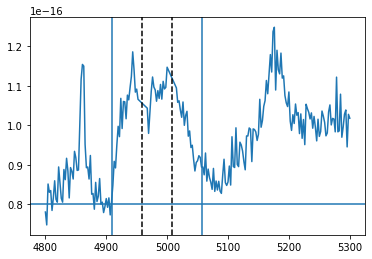

In [44]:
idx = np.logical_and(spec['restwave'] > 4800, spec['restwave'] < 5300)
plt.plot(spec['restwave'][idx], spec['flux'][idx])
wave_start = 4959 - region_size
wave_stop = 5007 + region_size
plt.axvline(wave_start)
plt.axvline(wave_stop)
bkg = 0.8e-16
plt.axhline(bkg)
idx = np.logical_and(spec['restwave'] > wave_start, spec['restwave'] < wave_stop)

# interpolate
wave_interp = np.linspace(spec['restwave'][idx].min(), spec['restwave'][idx].max())
flux_interp = np.interp(wave_interp, spec['restwave'][idx], spec['flux'][idx])

#total_flux = np.trapz(spec['flux'][idx], spec['restwave'][idx])
#bkg_flux = np.trapz(bkg*np.ones(np.count_nonzero(idx)), spec['restwave'][idx])
total_flux = np.trapz(flux_interp, wave_interp)
bkg_flux = np.trapz(bkg*np.ones(len(wave_interp)), wave_interp)

print('%e - %e = %e' % (flux2luminosity(total_flux, dist_cm), flux2luminosity(bkg_flux, dist_cm), flux2luminosity(total_flux-bkg_flux, dist_cm)))
plt.axvline(5007, ls='--', color='black')
plt.axvline(4959, ls='--', color='black')

lum_4959_5007 = flux2luminosity(total_flux-bkg_flux, dist_cm)

3.795930e+39 - 3.557061e+39 = 2.388689e+38


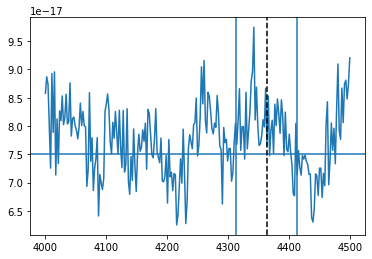

In [43]:
idx = np.logical_and(spec['restwave'] > 4000, spec['restwave'] < 4500)
plt.plot(spec['restwave'][idx], spec['flux'][idx])
wave_start = 4363 - region_size
wave_stop = 4363 + region_size
plt.axvline(wave_start)
plt.axvline(wave_stop)
bkg = 0.75e-16
plt.axhline(bkg)
idx = np.logical_and(spec['restwave'] > wave_start, spec['restwave'] < wave_stop)

# interpolate
wave_interp = np.linspace(spec['restwave'][idx].min(), spec['restwave'][idx].max())
flux_interp = np.interp

total_flux = np.trapz(spec['flux'][idx], spec['restwave'][idx])
bkg_flux = np.trapz(bkg*np.ones(np.count_nonzero(idx)), spec['restwave'][idx])
print('%e - %e = %e' % (flux2luminosity(total_flux, dist_cm), flux2luminosity(bkg_flux, dist_cm), flux2luminosity(total_flux-bkg_flux, dist_cm)))
plt.axvline(4363, ls='--', color='black')
lum_4363 = flux2luminosity(total_flux-bkg_flux, dist_cm)

In [45]:
# Ergo the ratio is:
lum_4959_5007/lum_4363

7.209765198247475

In [46]:
np.log10(lum_4363/lum_4959_5007)

-0.8579211212012691

In [76]:
np.log10(lum_4363/lum_4959_5007/2)

-1.1589511168652502

In [50]:
# now plot that in pyneb..

In [51]:
O3_EG = pn.EmisGrid('O', 3, n_tem=30, n_den=30)

In [52]:
O3_EG = pn.EmisGrid(elem='O', spec=3, n_tem=100, n_den=100, 
                    tem_min=3000., tem_max=10000., den_min=10., 
                    den_max=5.e8, restore_file=None, atomObj=None)

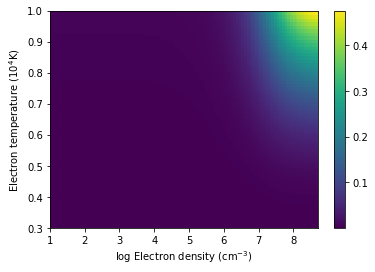

In [54]:
O3_EG.plotImage(to_eval = 'L(4363)/(L(5007)+L(4959))')

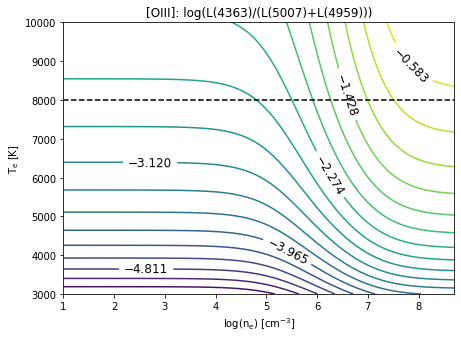

In [56]:
f, ax = plt.subplots(figsize=(7,5))
O3_EG.plotContours(to_eval = 'L(4363)/(L(5007)+L(4959))', ax=ax)
plt.axhline(8000, ls='--', color='black')

ValueError: Contour levels must be increasing

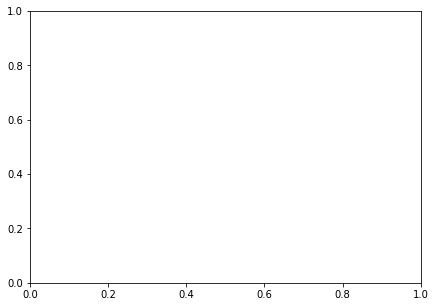

In [80]:
f, ax = plt.subplots(figsize=(7,5))
O3_EG.plotContours(to_eval = 'L(5007)/L(4959)', ax=ax)
plt.axhline(8000, ls='--', color='black')

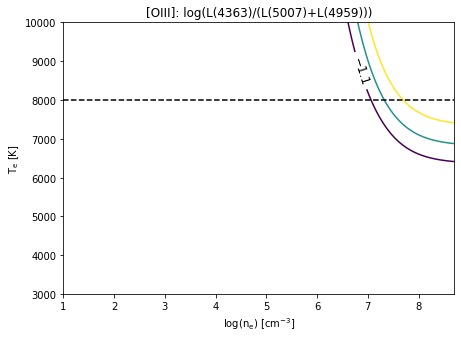

In [78]:
f, ax = plt.subplots(figsize=(7,5))
O3_EG.plotContours(to_eval = 'L(4363)/(L(5007)+L(4959))', ax=ax, low_level=-1.1, high_level=-0.8, log_level=True, n_levels=3)
plt.axhline(8000, ls='--', color='black')

In [72]:
O3_EG.plotContours?

In [68]:
# now try to solve to Te using the Nicholls2013 thing
a = 13229
b = 0.92350
c = 0.98196
d = 3.8895E-04

ne = 2e8
ratio = lum_4363/lum_4959_5007

def func(x):
    te = x
    new_te = a*(-np.log10(ratio/(1+d*(ne/te**0.5)))-b)**-c
    return new_te-te
    
#from scipy.optimize import differential_evolution
#differential_evolution(func, bounds=((1000, 11e3)))
te = 3000
for i in range(50):
    print(i, te)
    te = func(te)

0 3000
1 1373.2993153504913
2 2776.2775615875726
3 1573.7526980066987
4 2613.1592181718124
5 1718.863850846894
6 2492.5801773081976
7 1825.4977058476825
8 2402.8542400479373
9 1904.4638234147405
10 2335.866365056653
11 1963.1901180076202
12 2285.7725770094466
13 2006.9711088295662
14 2248.283028255737
15 2039.6575968882562
16 2220.2167449251365
17 2064.0826125588474
18 2199.2025714703823
19 2082.3443226631653
20 2183.4683020811153
21 2096.002781860141
22 2171.6876939979184
23 2106.22070543284
24 2162.867690949638
25 2113.8659429287954
26 2156.2645745370273
27 2119.586855624625
28 2151.321349740064
29 2123.8681158185746
30 2147.620888412066
31 2127.0721745540086
32 2144.8508329794295
33 2129.470153777118
34 2142.777300664169
35 2131.264895597881
36 2141.225181113814
37 2132.6081770103074
38 2140.0633757627065
39 2133.6135754836105
40 2139.193741052829
41 2134.3660884676174
42 2138.542807322553
43 2134.92932802027
44 2138.05557737452
45 2135.350902964593
46 2137.6908829492695
47 2135.666